In [60]:
import numpy as np
import pandas as pd
import collections
from sklearn.metrics import accuracy_score
from sklearn import tree
clf = tree.DecisionTreeClassifier(max_depth=3)

# Synthetic dataset
We'll use a synthetic dataset for small demonstration

In [70]:
df = pd.read_csv("./datasets/acceptance.csv", index_col=0)
df

,speed,swim,gpa,eye_color,accepted
0,68.0,10.0,3.676395,1.0,1.0
1,74.0,15.0,4.095040,0.0,0.0
2,77.0,18.0,4.277151,0.0,0.0
3,94.0,10.0,3.256144,1.0,1.0
4,94.0,19.0,3.439109,1.0,1.0
...,...,...,...,...,...
295,75.0,13.0,4.359321,1.0,1.0
296,113.0,14.0,4.999912,1.0,0.0
297,98.0,14.0,4.322307,1.0,1.0
298,112.0,14.0,3.639233,1.0,0.0


In [71]:
# Our dataset is balanced
counts = collections.Counter(df["accepted"])
counts

Counter({1.0: 150, 0.0: 150})

In [80]:
clf = clf.fit(df.drop(columns=["accepted"]), df["accepted"])

[Text(0.4, 0.8333333333333334, 'x[3] <= 0.5\ngini = 0.5\nsamples = 300\nvalue = [150, 150]'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 62\nvalue = [62, 0]'),
 Text(0.6, 0.5, 'x[2] <= 3.653\ngini = 0.466\nsamples = 238\nvalue = [88, 150]'),
 Text(0.4, 0.16666666666666666, 'gini = 0.499\nsamples = 88\nvalue = [42, 46]'),
 Text(0.8, 0.16666666666666666, 'gini = 0.425\nsamples = 150\nvalue = [46, 104]')]

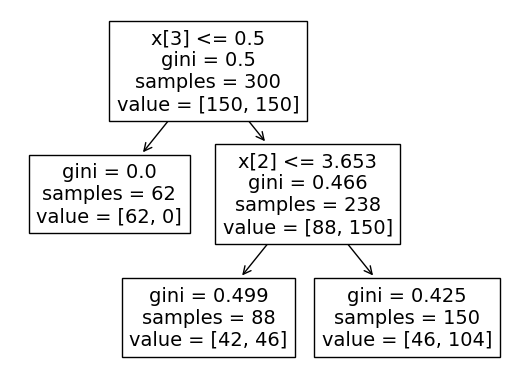

In [81]:
tree.plot_tree(clf)

[Text(0.5, 0.8333333333333334, 'x[1] <= 15.5\ngini = 0.5\nsamples = 300\nvalue = [150, 150]'),
 Text(0.25, 0.5, 'x[0] <= 64.5\ngini = 0.473\nsamples = 180\nvalue = [69, 111]'),
 Text(0.125, 0.16666666666666666, 'gini = 0.142\nsamples = 13\nvalue = [12, 1]'),
 Text(0.375, 0.16666666666666666, 'gini = 0.45\nsamples = 167\nvalue = [57, 110]'),
 Text(0.75, 0.5, 'x[0] <= 88.5\ngini = 0.439\nsamples = 120\nvalue = [81, 39]'),
 Text(0.625, 0.16666666666666666, 'gini = 0.148\nsamples = 62\nvalue = [57, 5]'),
 Text(0.875, 0.16666666666666666, 'gini = 0.485\nsamples = 58\nvalue = [24, 34]')]

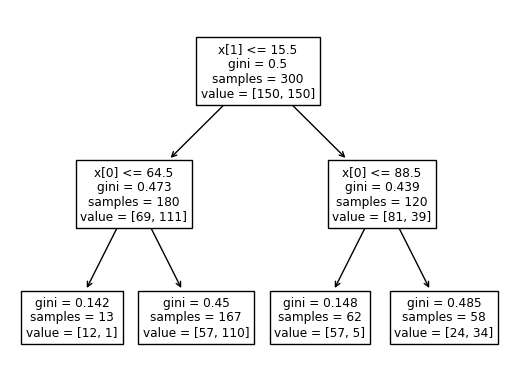

In [77]:
clf = tree.DecisionTreeClassifier(max_depth=2)
clf = clf.fit(df.drop(columns=["accepted", "eye_color"]), df["accepted"])
tree.plot_tree(clf)

In [79]:
accuracy_score(clf.predict(df.drop(columns=["accepted", "eye_color"])), df["accepted"])

0.71